In [21]:
#Task 02(Regression)
#Dataset: Kdrama.csv
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
#Load Dataset
df = pd.read_csv("C:/DS/Final_assignment(36508)/2.kdrama.csv")
df.head()

,Name,Aired Date,Year of release,Original Network,Aired On,Number of Episodes,Duration,Content Rating,Rating,Synopsis,Genre,Tags,Director,Screenwriter,Cast,Production companies,Rank
0,Move to Heaven,"May 14, 2021",2021,Netflix,Friday,10,52 min.,18+ Restricted (violence & profanity),9.2,Geu Roo is a young autistic man. He works for ...,"Life, Drama, Family","Autism, Uncle-Nephew Relationship, Death, Sava...",Kim Sung Ho,Yoon Ji Ryun,"Lee Je Hoon, Tang Jun Sang, Hong Seung Hee, Ju...","Page One Film, Number Three Pictures",#1
1,Flower of Evil,"Jul 29, 2020 - Sep 23, 2020",2020,tvN,"Wednesday, Thursday",16,1 hr. 10 min.,15+ - Teens 15 or older,9.1,Although Baek Hee Sung is hiding a dark secret...,"Thriller, Romance, Crime, Melodrama","Married Couple, Deception, Suspense, Family Se...","Kim Chul Gyu, Yoon Jong Ho",Yoo Jung Hee,"Lee Joon Gi, Moon Chae Won, Jang Hee Jin, Seo ...",Monster Union,#2
2,Hospital Playlist,"Mar 12, 2020 - May 28, 2020",2020,"Netflix, tvN",Thursday,12,1 hr. 30 min.,15+ - Teens 15 or older,9.1,The stories of people going through their days...,"Friendship, Romance, Life, Medical","Strong Friendship, Multiple Mains, Best Friend...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#3
3,Hospital Playlist 2,"Jun 17, 2021 - Sep 16, 2021",2021,"Netflix, tvN",Thursday,12,1 hr. 40 min.,15+ - Teens 15 or older,9.1,Everyday is extraordinary for five doctors and...,"Friendship, Romance, Life, Medical","Workplace, Strong Friendship, Best Friends, Mu...",Shin Won Ho,Lee Woo Jung,"Jo Jung Suk, Yoo Yeon Seok, Jung Kyung Ho, Kim...","Egg Is Coming, CJ ENM",#4
4,My Mister,"Mar 21, 2018 - May 17, 2018",2018,tvN,"Wednesday, Thursday",16,1 hr. 17 min.,15+ - Teens 15 or older,9.1,Park Dong Hoon is a middle-aged engineer who i...,"Psychological, Life, Drama, Family","Age Gap, Nice Male Lead, Strong Female Lead, H...","Kim Won Suk, Kim Sang Woo",Park Hae Young,"Lee Sun Kyun, IU, Park Ho San, Song Sae Byuk, ...",Chorokbaem Media,#5


In [23]:
#Understand the Dataset

df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Name                  250 non-null    object 
 1   Aired Date            250 non-null    object 
 2   Year of release       250 non-null    int64  
 3   Original Network      250 non-null    object 
 4   Aired On              250 non-null    object 
 5   Number of Episodes    250 non-null    int64  
 6   Duration              250 non-null    object 
 7   Content Rating        245 non-null    object 
 8   Rating                250 non-null    float64
 9   Synopsis              250 non-null    object 
 10  Genre                 250 non-null    object 
 11  Tags                  250 non-null    object 
 12  Director              249 non-null    object 
 13  Screenwriter          249 non-null    object 
 14  Cast                  250 non-null    object 
 15  Production companies  2

Name                    0
Aired Date              0
Year of release         0
Original Network        0
Aired On                0
Number of Episodes      0
Duration                0
Content Rating          5
Rating                  0
Synopsis                0
Genre                   0
Tags                    0
Director                1
Screenwriter            1
Cast                    0
Production companies    2
Rank                    0
dtype: int64

The dataset contains information about Korean dramas including release year, episode count, duration, and ratings.

The target variable is Rating, which is continuous.

In [24]:
#Data Cleaning and Preprocessing 
#Convert Duration to Numerical Minutes

def convert_duration(duration):
    if 'hr' in duration:
        parts = duration.replace('.', '').split()
        hours = int(parts[0])
        minutes = int(parts[2])if 'min' in duration else 0
        return hours*60 + minutes
    else:
        return int(duration.replace('min.', '').strip())
    
df['Duration_min'] = df['Duration'].apply(convert_duration)

In [25]:
#Select Relevant Columns 

df_reg = df [['Year of release', 'Number of Episodes', 'Duration_min', 'Rating']]
df_reg.head()


,Year of release,Number of Episodes,Duration_min,Rating
0,2021,10,52,9.2
1,2020,16,70,9.1
2,2020,12,90,9.1
3,2021,12,100,9.1
4,2018,16,77,9.1


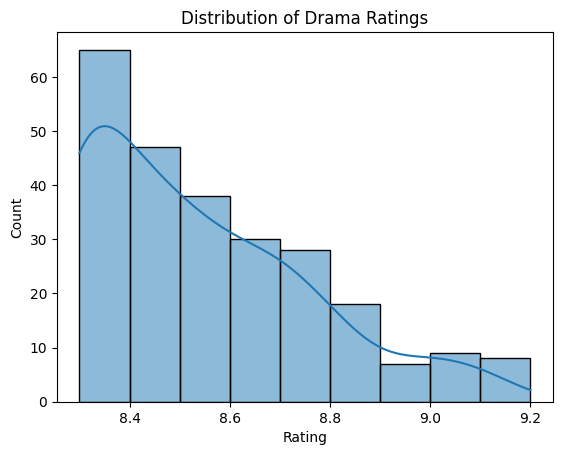

In [26]:
#Exploratory Data Analysis(EDA)
#Distribution of Ratings

sns.histplot(df_reg['Rating'], kde=True)
plt.title("Distribution of Drama Ratings")
plt.show()

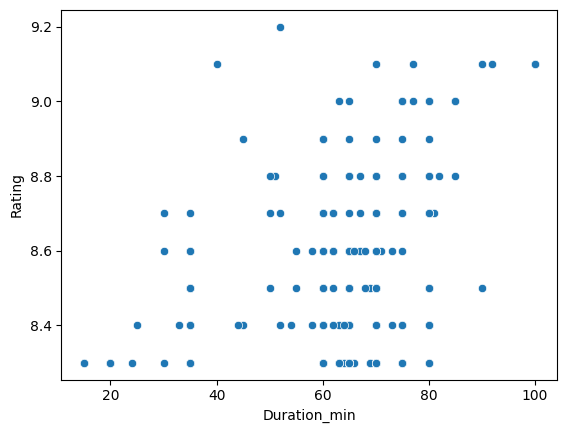

In [27]:
#Scatter Plot(Episodes vs Rating)

sns.scatterplot(x='Duration_min', y='Rating', data=df_reg)
plt.show()

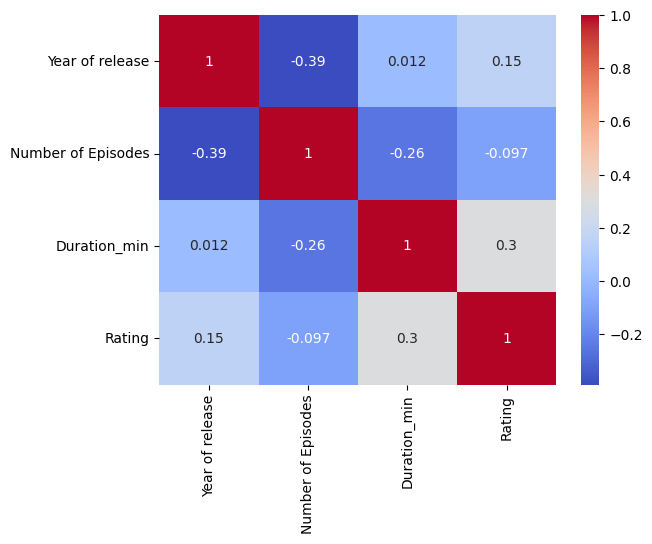

In [28]:
#Correlation Heatmap

sns.heatmap(df_reg.corr(), annot=True, cmap='coolwarm')
plt.show()

The correlation heatmap shows a moderate relationship between duration and rating, while the number of episodes shows a weaker correlation.

In [29]:
#Features Selection

x = df_reg.drop('Rating', axis=1)
y = df_reg['Rating']

In [30]:
#Train-Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
   x, y, test_size=0.2, random_state=42 
)

In [31]:
#Build Regression model (Linear Regression)

from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [32]:
#Model prediction

y_pred = model.predict(x_test)

In [33]:
#Model Evaluation

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score (y_test, y_pred))

MAE: 0.19003157496398726
MSE: 0.054222367908777186
R2 Score: 0.06616202967798857


In [34]:
#Interpretation of Results

The Mean Absolute Error indicates the average difference between predicted and actual ratings.

The R2 Score represents how well the independent variables explain variations in drama ratings.

In [35]:
#Conclusion

This regression model demonstrates that selected features such as duration and year of release have an influence on drama ratings.

Howeverc, ratings are also affected by qualitativee factors such as storyline and cast, which are not included in the model.